# Result description

## Test with publics datasets

In [1]:
import sys
sys.path.append('../../../../../')
from datasets import datasets as datat
dts = datat.reals_datasets(path_top="../../../../../")

from experiments import trainning_parametors
t_parametors = trainning_parametors.functions_train_parametors()


## Generals settings

In [2]:
#dts = datat.reals_datasets(path_top="../../../../")
max_samples = 256
n_trees = 100
threshold = 0.6
min_sample_size = 5
sample_size_step = 5

## Executions

### Dataset Shuttle_Goldein
#### Conclusion on this dataset :


################################################## IFOREST ###################################
X_Train is None. So, trainning on X_brut.
Confusion matrice
[[  840    37]
 [  320 45266]]
ROC AUC : 0.9753955096638173
Specificity : 0.9578107183580388
Precision : 0.9991832770456702
Recall : 0.9929803009695959
f1_score : 0.996072131941159
False alarm rate (%) : 27.586206896551722
CPU Time (s) : 327.98736476898193
Memory Consumption (o) : 23326720
****************************************************************
Result with EIF


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


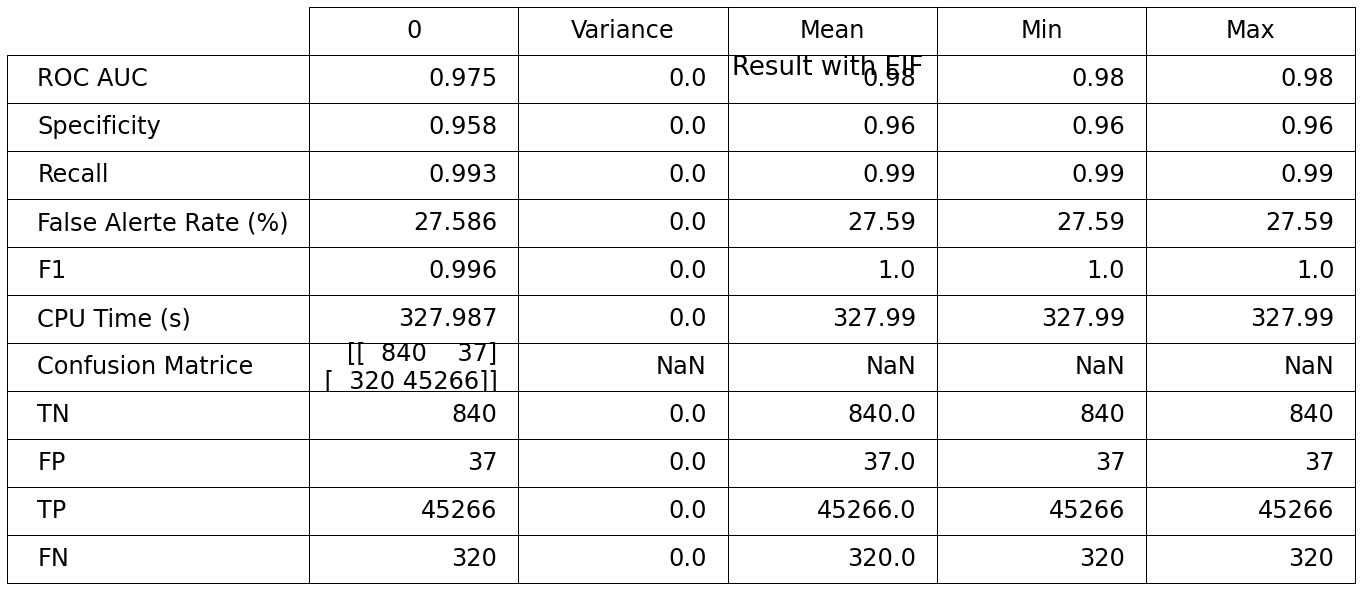

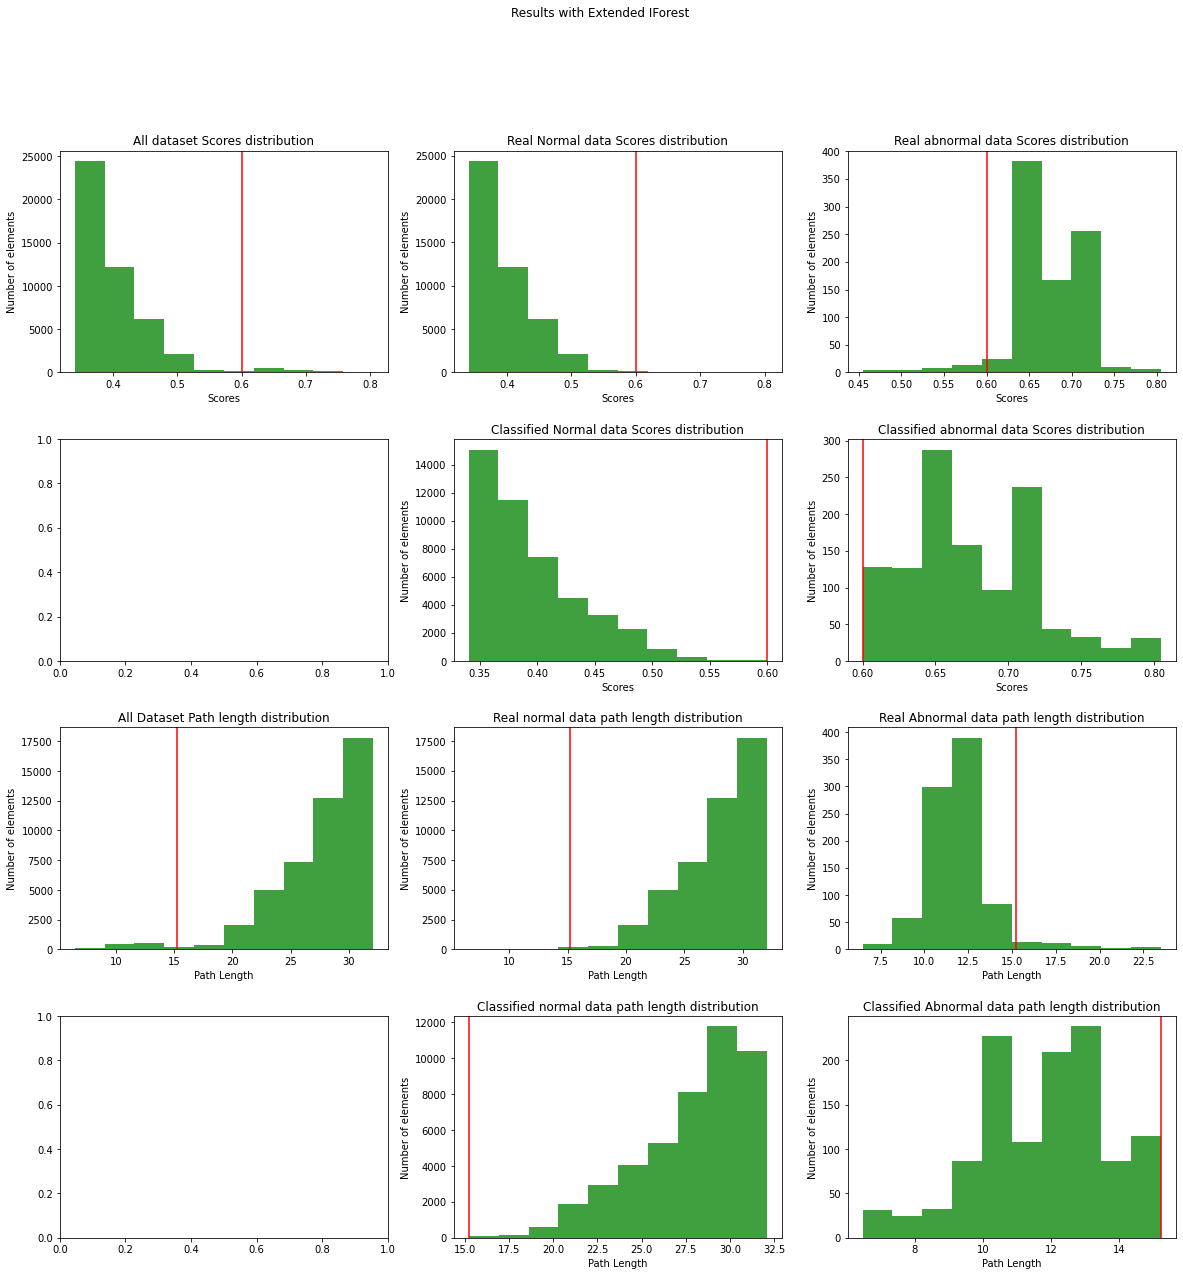

In [3]:
# Load the dataset
import pandas as pd
X_brut, y_transform, full_dataset = dts.Shuttle_Goldein()
x_lim = None
y_lim = None
#X_brut.describe()
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(X_brut)
print("################################################## IFOREST ###################################")
fig, axs, IFD_scores, IFD_paths_length = t_parametors.execute_local_eif_getting_informations(X_brut=X_brut, max_samples=max_samples, n_trees=n_trees, threshold=threshold, 
                y_transform=y_transform, x_lim=x_lim, y_lim=y_lim, n_dimensions=4)

In [4]:
print(IFD_scores)

[0.67975421 0.68962669 0.70671536 ... 0.36734581 0.39198106 0.4143124 ]


In [5]:
def save_scores(scores, folder_path="NULL", output_file = 'output.csv'):
    import os
    import pandas as pd
    result = pd.DataFrame(scores)
    result.to_csv(output_file,index=False)
    return output_file

In [6]:
print(save_scores(IFD_scores))

output.csv


In [7]:
print(IFD_scores.mean())

0.4024239467194149


In [8]:
pd_scores = pd.DataFrame(IFD_scores)
sorted_scores = pd_scores.sort_values(by=0, axis=0, 
                                      ascending=True, inplace=False, 
                                      kind='quicksort', na_position='last', 
                                      ignore_index=False, key=None)
print(sorted_scores)

              0
18372  0.340538
14812  0.340580
37789  0.341188
43048  0.341193
1339   0.341199
...         ...
8735   0.800984
10170  0.803053
23396  0.803698
278    0.803698
719    0.804786

[46463 rows x 1 columns]


In [9]:
moit = int(len(sorted_scores)/2)
print(moit)

23231


In [10]:
first = sorted_scores[:moit]
rest = sorted_scores[moit:]

In [11]:
print(first)

              0
18372  0.340538
14812  0.340580
37789  0.341188
43048  0.341193
1339   0.341199
...         ...
25148  0.383993
4558   0.383994
44869  0.383995
11299  0.383999
6599   0.384001

[23231 rows x 1 columns]


In [12]:
print(rest)

              0
16650  0.384002
3940   0.384002
32078  0.384004
41111  0.384010
17193  0.384011
...         ...
8735   0.800984
10170  0.803053
23396  0.803698
278    0.803698
719    0.804786

[23232 rows x 1 columns]


In [13]:
print("first mean = "+str(first.mean()))
print("rest mean = "+str(rest.mean()))


first mean = 0    0.362802
dtype: float64
rest mean = 0    0.442045
dtype: float64


In [14]:
print("first quantiles = "+str(first.quantile([0.25, 0.5, 0.75, 0.9])))
print("rest quantiles = "+str(rest.quantile([0.25, 0.5, 0.75, 0.9, 0.95])))

first quantiles =              0
0.25  0.354927
0.50  0.361740
0.75  0.370499
0.90  0.378062
rest quantiles =              0
0.25  0.399339
0.50  0.423284
0.75  0.460721
0.90  0.498710
0.95  0.599103


In [15]:
print("first median = "+str(first.median()))
print("rest median = "+str(rest.median()))

first median = 0    0.36174
dtype: float64
rest median = 0    0.423284
dtype: float64


In [16]:
print("first std = "+str(first.std()))
print("rest std = "+str(rest.std()))

first std = 0    0.01029
dtype: float64
rest std = 0    0.065659
dtype: float64


In [17]:
print("first var = "+str(first.var()))
print("rest var = "+str(rest.var()))

first var = 0    0.000106
dtype: float64
rest var = 0    0.004311
dtype: float64


In [18]:
print("pd_scores var = "+str(pd_scores.var()))
print("pd_scores std = "+str(pd_scores.std()))

pd_scores var = 0    0.003778
dtype: float64
pd_scores std = 0    0.061469
dtype: float64


In [19]:
import numpy as np
number = []
variances = []
ecarttypes = []
for i in np.arange(0.1, 1.1, 0.1):
    nbre = int(len(sorted_scores)*i)
    dataf = sorted_scores[:nbre]
    number.append(i)
    variances.append(dataf.var())
    ecarttypes.append(dataf.std())

stats = {'percentage': number, 'ecarttype':ecarttypes, 'variances':variances}
stats_df = pd.DataFrame(stats, columns=['percentage', 'ecarttype', 'variances'])
print(stats_df)

   percentage                     ecarttype                     variances
0         0.1  0    0.002925
dtype: float64  0    0.000009
dtype: float64
1         0.2  0    0.004317
dtype: float64  0    0.000019
dtype: float64
2         0.3  0    0.005626
dtype: float64  0    0.000032
dtype: float64
3         0.4  0    0.007451
dtype: float64  0    0.000056
dtype: float64
4         0.5   0    0.01029
dtype: float64  0    0.000106
dtype: float64
5         0.6  0    0.013848
dtype: float64  0    0.000192
dtype: float64
6         0.7  0    0.018086
dtype: float64  0    0.000327
dtype: float64
7         0.8  0    0.024036
dtype: float64  0    0.000578
dtype: float64
8         0.9  0    0.032505
dtype: float64  0    0.001057
dtype: float64
9         1.0  0    0.061469
dtype: float64  0    0.003778
dtype: float64


Text(0, 0.5, 'ecarttype')

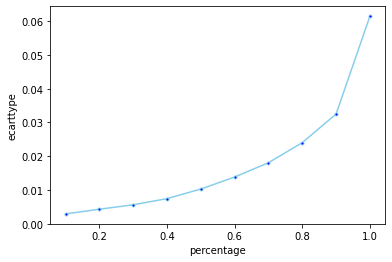

In [20]:
import matplotlib.pyplot as plt
plt.plot(stats_df['percentage'], stats_df['ecarttype'], "b-", marker='.', markerfacecolor='blue', 
                 markersize=6, color='skyblue')
#plt.title(title)
plt.xlabel("percentage")
plt.ylabel("ecarttype")
#plt.axis([xmin, xmax, ymin, ymax])

Text(0, 0.5, 'variances')

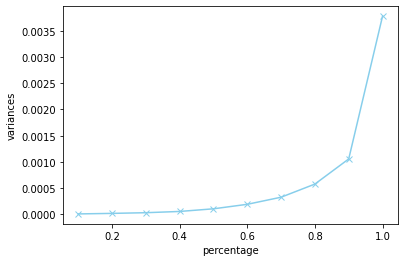

In [21]:
plt.plot(stats_df['percentage'], stats_df['variances'], "b-", marker='x', markerfacecolor='red', 
                 markersize=6, color='skyblue')
#plt.title(title)
plt.xlabel("percentage")
plt.ylabel("variances")
#plt.axis([xmin, xmax, ymin, ymax])

In [24]:
nbre = int(len(sorted_scores)*0.9)
dataf_rest = sorted_scores[nbre:]
print(dataf_rest)

              0
37339  0.471439
7332   0.471453
17301  0.471461
14654  0.471464
10640  0.471472
...         ...
8735   0.800984
10170  0.803053
23396  0.803698
278    0.803698
719    0.804786

[4647 rows x 1 columns]
